Use this cell to change your current directory to where you have the data saved.

In [1]:
%cd "C:/Users/csmit/Documents/Capstone/"

C:\Users\csmit\Documents\Capstone


Import Packages and CSV file. Assign the index of the data frame as a combination of the date and time columns with "parse dates"

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns #If interested in Correlation Plots 

Read in the files, in this instance combining multiple files into one dataframe. Key for some of the later functions with rolling windows is setting the index of the dataframe to a datetime format. This format is derived through a combination of the date and time columns in the ROAR data file. This allows windows to be set on time, rather than data points, as the sampling is not a consistent time value. 

In [3]:
dfF1 = pd.read_csv('ROAR/30JUN/SimData_2022.06.30_09.43.28.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']}, index_col = 'datetime',
                low_memory=False)

dfF2 = pd.read_csv('ROAR/30JUN/SimData_2022.06.30_10.27.04.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']}, index_col = 'datetime',
                low_memory=False)
df= pd.concat([dfF1, dfF2], axis = 0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 351745 entries, 2022-06-30 13:44:07.896000 to 2022-06-30 15:58:52.357000
Columns: 106 entries, _id to vil
dtypes: bool(18), float64(83), int64(1), object(4)
memory usage: 244.9+ MB
None


Look At Correlations in the overall data set. 

In [4]:
###Print out the DataFrame 
df

,_id,latitude,longitude,gpsAltitude,absoluteAltitude,magneticHeading,trueHeading,pitch,roll,yaw,...,hasMainRotorLowRpmWarning,hasMainRotorHighRpmWarning,hasTailRotorChipWarning,hasTransmissionChipCaution,hasTransmissionOilTemperatureWarning,hasTransmissionOilPressureWarning,timestamp,gpsDateTime,seconds,vil
datetime,,,,,,,,,,,,,,,,,,,,,
2022-06-30 13:44:07.896,::1656611047.896,20.889360,-156.436185,36.76,0.05,25.188,34.669,0.407,-0.311,34.819,...,False,False,False,False,False,False,2022-06-30T13:44:07.896Z,2022-06-30T13:44:07.896Z,1.656611e+09,-2
2022-06-30 13:44:07.914,::1656611047.914,20.889361,-156.436185,36.76,0.05,25.185,34.666,0.365,-0.359,34.816,...,False,False,False,False,False,False,2022-06-30T13:44:07.914Z,2022-06-30T13:44:07.914Z,1.656611e+09,-2
2022-06-30 13:44:07.940,::1656611047.94,20.889361,-156.436185,36.76,0.05,25.181,34.661,0.311,-0.409,34.812,...,False,False,False,False,False,False,2022-06-30T13:44:07.940Z,2022-06-30T13:44:07.940Z,1.656611e+09,-2
2022-06-30 13:44:07.961,::1656611047.961,20.889361,-156.436185,36.76,0.04,25.174,34.655,0.230,-0.459,34.807,...,False,False,False,False,False,False,2022-06-30T13:44:07.961Z,2022-06-30T13:44:07.961Z,1.656611e+09,-2
2022-06-30 13:44:07.979,::1656611047.979,20.889361,-156.436185,36.75,0.04,25.169,34.650,0.158,-0.483,34.802,...,False,False,False,False,False,False,2022-06-30T13:44:07.979Z,2022-06-30T13:44:07.979Z,1.656611e+09,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30 15:58:52.251,::1656619132.251,20.888826,-156.433509,36.86,0.12,5.604,15.085,-0.921,0.487,15.244,...,False,False,False,False,False,False,2022-06-30T15:58:52.251Z,2022-06-30T15:58:52.251Z,1.656619e+09,-2
2022-06-30 15:58:52.277,::1656619132.277,20.888826,-156.433509,36.86,0.12,5.604,15.085,-0.920,0.486,15.245,...,False,False,False,False,False,False,2022-06-30T15:58:52.277Z,2022-06-30T15:58:52.277Z,1.656619e+09,-2
2022-06-30 15:58:52.303,::1656619132.303,20.888826,-156.433509,36.86,0.12,5.605,15.086,-0.920,0.486,15.246,...,False,False,False,False,False,False,2022-06-30T15:58:52.303Z,2022-06-30T15:58:52.303Z,1.656619e+09,-2


I like to use a plot of the altitude to get a rough view of what the flight looks like, if altitude is consistently say 500ft and above, they likely are in a cruise and not doing too many hover maneuvers so we can discount the dataset. This is an assumption that excludes hover out of ground effect, but works for the setting of this particular project. 

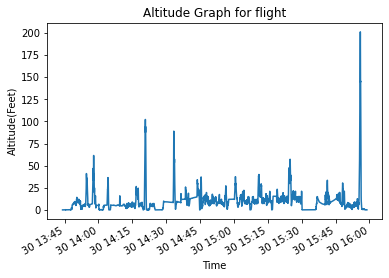

In [5]:
df.absoluteAltitude.plot()
plt.xlabel('Time')
plt.ylabel('Altitude(Feet)')
plt.title('Altitude Graph for flight')
plt.show()

For simplicity we reduced the original 106 predictors down to columns that we think will have a noticeable effect on hover or not hover along with the turns. This will reduce the computational requirements for some of the machine learning models. The target columns were determined by a group member who is an Army helicopter pilot. 

In [6]:
# initalize hover or not, left turn, right turn column
df2 = df[['latitude',
          'longitude', 
          'absoluteAltitude', 
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed', 
          'climbOrDescentRate', 
          'hasWeightOnWheels', 
          'turnRate to degPerSec', 
          'cyclicPositionPitch', 
          'cyclicPositionRoll', 
          'collectivePosition', 
          'antiTorquePedalPosition', 
          'throttlePosition', 
          'e1Torque', 
          'e2Torque',
]]

# Create dummy variable columns related to the maneuvers. These columns become 0 or 1 based off the flight logs. 
# We initialize the variables with a state of 0 to fill the columns 
df2['HoverOrNot'] = 0
df2['RightTurn'] = 0
df2['LeftTurn'] = 0
df2['HoverBox'] = 0
df2['TurnABpointCW'] = 0 
df2['TurnABpointCCW'] = 0 

C:\Users\csmit\AppData\Local\Temp\ipykernel_22464\2313673395.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['HoverOrNot'] = 0
C:\Users\csmit\AppData\Local\Temp\ipykernel_22464\2313673395.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['RightTurn'] = 0
C:\Users\csmit\AppData\Local\Temp\ipykernel_22464\2313673395.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

For this I calculated several statistics and assigned them a new 

In [7]:
def CompassTurn(x):
    if x[-1] < 90 and x[0] > 270: 
        return ((x[-1]+360)-x[0])
    else: 
        return(x[-1]-x[0])

Incorporate time series data. Here we use rolling functions with variable windows. The windows are chosen through trial and error. A future project or script could look at optimizing these windows through some form of machine learning. Using these columns does make it a time series dataset. The rolling call uses a window set by a length of time, this only works if the data is read in with the index set to date time, otherwise we would have to use a numerical window that takes x number of data points each time. We then apply a function that takes the current value of say altitude and subtracts it from the altitude at the end of the window. 

In [8]:
df2['turnDirection'] = df2['trueHeading'].rolling(window = '5s').apply(CompassTurn)

#df2['turnDirection'] = df2['trueHeading'].rolling(window = '5s').apply(lambda x: x[-1]-x[0], raw=True)
df2['Altdiff'] = df2['absoluteAltitude'].rolling(window = '20s').apply(lambda x: x[0]- x[-1], raw = True)
df2['longDiff'] = df2['longitude'].rolling(window = '10s').apply(lambda x: x[-1]-x[0], raw=True)
df2['latDiff'] = df2['latitude'].rolling(window = '10s').apply(lambda x: x[-1]-x[0], raw=True)

C:\Users\csmit\AppData\Local\Temp\ipykernel_22464\2371237083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['turnDirection'] = df2['trueHeading'].rolling(window = '5s').apply(CompassTurn)
C:\Users\csmit\AppData\Local\Temp\ipykernel_22464\2371237083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Altdiff'] = df2['absoluteAltitude'].rolling(window = '20s').apply(lambda x: x[0]- x[-1], raw = True)
C:\Users\csmit\AppData\Local\Temp\ipykernel_22464\2371237083.py:5: SettingWithCopyWarning: 
A va

In [9]:
df2

,latitude,longitude,absoluteAltitude,trueHeading,groundSpeed,trueAirspeed,climbOrDescentRate,hasWeightOnWheels,turnRate to degPerSec,cyclicPositionPitch,...,HoverOrNot,RightTurn,LeftTurn,HoverBox,TurnABpointCW,TurnABpointCCW,turnDirection,Altdiff,longDiff,latDiff
datetime,,,,,,,,,,,,,,,,,,,,,
2022-06-30 13:44:07.896,20.889360,-156.436185,0.05,34.669,0.129162,0.245881,0.413,1.0,-0.059,17.443,...,0,0,0,0,0,0,0.000,0.00,0.0,0.000000
2022-06-30 13:44:07.914,20.889361,-156.436185,0.05,34.666,0.132716,0.225144,0.526,1.0,-0.071,18.730,...,0,0,0,0,0,0,-0.003,0.00,0.0,0.000001
2022-06-30 13:44:07.940,20.889361,-156.436185,0.05,34.661,0.131531,0.229291,0.656,1.0,-0.084,19.742,...,0,0,0,0,0,0,-0.008,0.00,0.0,0.000001
2022-06-30 13:44:07.961,20.889361,-156.436185,0.04,34.655,0.123829,0.247066,0.809,1.0,-0.099,20.764,...,0,0,0,0,0,0,-0.014,0.01,0.0,0.000001
2022-06-30 13:44:07.979,20.889361,-156.436185,0.04,34.650,0.115534,0.242326,0.904,1.0,-0.108,21.587,...,0,0,0,0,0,0,-0.019,0.01,0.0,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30 15:58:52.251,20.888826,-156.433509,0.12,15.085,0.001185,0.002370,-0.069,1.0,-0.015,-47.212,...,0,0,0,0,0,0,-0.254,-0.01,0.0,0.000000
2022-06-30 15:58:52.277,20.888826,-156.433509,0.12,15.085,0.001185,0.002370,-0.069,1.0,-0.015,-47.259,...,0,0,0,0,0,0,-0.254,-0.01,0.0,0.000000
2022-06-30 15:58:52.303,20.888826,-156.433509,0.12,15.086,0.001185,0.002370,-0.068,1.0,-0.015,-47.294,...,0,0,0,0,0,0,-0.253,-0.01,0.0,0.000000


These values present the parameters we are working off of. Again they are found through trial and error. Further work could optimize these parameters. These functions filter the data to return values greater than zero only if the conditions are met, otherwise they return 0, or the maneuver is not occurring. We use these numerical values for plotting purposes only, as 0 and 1 would be difficult to visually see with multiple events happening. For Hover we assume IGE hover. 

In [10]:
#Model Parameters 
HoverLLimit = 2
HoverULimit = 50
StatHoverGroundSpeed = 5
HoverAltInd = 12
PedalTurnHeadingInd = 10   
TABPInd = 0.00002

In [11]:
def hover(x): 
    if x['absoluteAltitude'] > HoverLLimit and \
        x['absoluteAltitude'] < HoverULimit and \
        x['groundSpeed'] < StatHoverGroundSpeed and \
        x['Altdiff'] < HoverAltInd and \
        x['Altdiff'] > -HoverAltInd: return 10
    else: return 0 
df2['LabHoverOrNot'] = df2.apply(hover, axis = 1)

def LTurn(x): 
    if x['absoluteAltitude'] > HoverLLimit and \
        x['absoluteAltitude'] < HoverULimit and \
        x['groundSpeed'] < 2 and \
        x['Altdiff'] < HoverAltInd and \
        x['Altdiff'] > -HoverAltInd and \
        x['turnDirection'] < -PedalTurnHeadingInd: return 3
    else: return 0

def RTurn(x): 
    if x['absoluteAltitude'] > HoverLLimit and \
        x['absoluteAltitude'] < HoverULimit and \
        x['groundSpeed'] < 2 and \
        x['Altdiff'] < HoverAltInd and \
        x['Altdiff'] > -HoverAltInd and \
        x['turnDirection'] > PedalTurnHeadingInd: return 7
    else: return 0 

def TABPointCW(x): 
    if x['absoluteAltitude'] > HoverLLimit and \
        x['absoluteAltitude'] < HoverULimit and \
        x['groundSpeed'] < 5 and \
        x['groundSpeed'] > 2 and \
        x['Altdiff'] < HoverAltInd and \
        x['Altdiff'] > -HoverAltInd and \
        x['turnDirection'] > 15 and\
        x['longDiff'] > -0.0006 and \
        x['longDiff'] < 0.0002 and \
        x['latDiff'] < 0.0006 and \
        x['latDiff'] > -0.0006: return 7
    else: return 0
  
def TABPointCCW(x): 
    if x['absoluteAltitude'] > HoverLLimit and \
        x['absoluteAltitude'] < HoverULimit and \
        x['groundSpeed'] < 5 and \
        x['groundSpeed'] > 2 and \
        x['Altdiff'] < HoverAltInd and \
        x['Altdiff'] > -HoverAltInd and \
        x['turnDirection'] < -15 and\
        x['longDiff'] > -0.0006 and \
        x['longDiff'] < 0.0002 and \
        x['latDiff'] < 0.0006 and \
        x['latDiff'] > -0.0006: return 6
    else: return 0
    
df2['LabRightTurn'] = df2.apply(RTurn, axis = 1)
df2['LabLeftTurn'] = df2.apply(LTurn, axis = 1)
df2['LabTurnABPCW'] = df2.apply(TABPointCW, axis = 1)
df2['LabTurnABPCCW'] = df2.apply(TABPointCCW, axis = 1)

C:\Users\csmit\AppData\Local\Temp\ipykernel_22464\853160993.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['LabHoverOrNot'] = df2.apply(hover, axis = 1)
C:\Users\csmit\AppData\Local\Temp\ipykernel_22464\853160993.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['LabRightTurn'] = df2.apply(RTurn, axis = 1)
C:\Users\csmit\AppData\Local\Temp\ipykernel_22464\853160993.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [12]:
df3=df2
# Assign Hover Or Not based on the log
df3.loc[(df3.index >= '2022-06-30 13:48:49') & (df3.index <= '2022-06-30 13:50:15'),['HoverOrNot']] = 12
df3.loc[(df3.index >= '2022-06-30 13:51:58') & (df3.index <= '2022-06-30 13:52:20'),['HoverOrNot']] = 12
df3.loc[(df3.index >= '2022-06-30 13:53:15') & (df3.index <= '2022-06-30 13:54:18'),['HoverOrNot']] = 12
df3.loc[(df3.index >= '2022-06-30 13:56:23') & (df3.index <= '2022-06-30 13:57:13'),['HoverOrNot']] = 12
df3.loc[(df3.index >= '2022-06-30 13:59:00') & (df3.index <= '2022-06-30 14:00:14'),['HoverOrNot']] = 12
df3.loc[(df3.index >= '2022-06-30 14:02:12') & (df3.index <= '2022-06-30 14:03:50'),['HoverOrNot']] = 12
df3.loc[(df3.index >= '2022-06-30 14:05:25') & (df3.index <= '2022-06-30 14:16:10'),['HoverOrNot']] = 12
df3.loc[(df3.index >= '2022-06-30 14:18:10') & (df3.index <= '2022-06-30 14:19:34'),['HoverOrNot']] = 12
df3.loc[(df3.index >= '2022-06-30 14:22:40') & (df3.index <= '2022-06-30 14:24:40'),['HoverOrNot']] = 12


#Second Flight 
df3.loc[(df3.index >= '2022-06-30 14:28:13') & (df3.index <= '2022-06-30 14:33:12'),['HoverOrNot']] = 12
df3.loc[(df3.index >= '2022-06-30 14:34:10') & (df3.index <= '2022-06-30 14:38:29'),['HoverOrNot']] = 12
df3.loc[(df3.index >= '2022-06-30 14:40:10') & (df3.index <= '2022-06-30 14:43:40'),['HoverOrNot']] = 12
df3.loc[(df3.index >= '2022-06-30 14:46:00') & (df3.index <= '2022-06-30 14:55:55'),['HoverOrNot']] = 12
df3.loc[(df3.index >= '2022-06-30 14:57:10') & (df3.index <= '2022-06-30 15:00:16'),['HoverOrNot']] = 12
df3.loc[(df3.index >= '2022-06-30 15:01:20') & (df3.index <= '2022-06-30 15:07:03'),['HoverOrNot']] = 12
df3.loc[(df3.index >= '2022-06-30 15:07:38') & (df3.index <= '2022-06-30 15:10:38'),['HoverOrNot']] = 12
df3.loc[(df3.index >= '2022-06-30 15:12:02') & (df3.index <= '2022-06-30 15:24:07'),['HoverOrNot']] = 12
df3.loc[(df3.index >= '2022-06-30 15:25:30') & (df3.index <= '2022-06-30 15:30:17'),['HoverOrNot']] = 12

#3rd Flight
df3.loc[(df3.index >= '2022-06-30 15:36:45') & (df3.index <= '2022-06-30 15:40:24'),['HoverOrNot']] = 12
df3.loc[(df3.index >= '2022-06-30 15:42:28') & (df3.index <= '2022-06-30 15:55:20'),['HoverOrNot']] = 12


# Assign right turn based on the log
df3.loc[(df3.index >= '2022-06-30 13:48:49') & (df3.index <= '2022-06-30 13:50:05'),['RightTurn']] = 8
df3.loc[(df3.index >= '2022-06-30 13:59:20') & (df3.index <= '2022-06-30 14:00:14'),['RightTurn']] = 8
df3.loc[(df3.index >= '2022-06-30 14:02:38') & (df3.index <= '2022-06-30 14:03:28'),['RightTurn']] = 8
#Second Flight
df3.loc[(df3.index >= '2022-06-30 14:31:30') & (df3.index <= '2022-06-30 14:32:50'),['RightTurn']] = 8
df3.loc[(df3.index >= '2022-06-30 14:34:59') & (df3.index <= '2022-06-30 14:36:12'),['RightTurn']] = 8
df3.loc[(df3.index >= '2022-06-30 14:42:17') & (df3.index <= '2022-06-30 14:43:22'),['RightTurn']] = 8
df3.loc[(df3.index >= '2022-06-30 14:57:55') & (df3.index <= '2022-06-30 14:58:53'),['RightTurn']] = 8
#3rd Flight 
df3.loc[(df3.index >= '2022-06-30 15:37:21') & (df3.index <= '2022-06-30 15:38:40'),['RightTurn']] = 8
df3.loc[(df3.index >= '2022-06-30 15:42:48') & (df3.index <= '2022-06-30 15:44:04'),['RightTurn']] = 8



# Assign left turn based on the log
df3.loc[(df3.index >= '2022-06-30 13:51:58') & (df3.index <= '2022-06-30 13:52:20'),['LeftTurn']] = 5
df3.loc[(df3.index >= '2022-06-30 13:53:15') & (df3.index <= '2022-06-30 13:54:18'),['LeftTurn']] = 5
df3.loc[(df3.index >= '2022-06-30 13:56:23') & (df3.index <= '2022-06-30 13:57:13'),['LeftTurn']] = 5
#Second FLight 
df3.loc[(df3.index >= '2022-06-30 14:29:06') & (df3.index <= '2022-06-30 14:30:44'),['LeftTurn']] = 5
df3.loc[(df3.index >= '2022-06-30 14:36:47') & (df3.index <= '2022-06-30 14:38:13'),['LeftTurn']] = 5
df3.loc[(df3.index >= '2022-06-30 14:40:47') & (df3.index <= '2022-06-30 14:42:05'),['LeftTurn']] = 5
df3.loc[(df3.index >= '2022-06-30 14:57:10') & (df3.index <= '2022-06-30 14:57:45'),['LeftTurn']] = 5
df3.loc[(df3.index >= '2022-06-30 14:59:04') & (df3.index <= '2022-06-30 14:59:58'),['LeftTurn']] = 5
df3.loc[(df3.index >= '2022-06-30 15:17:25') & (df3.index <= '2022-06-30 15:18:09'),['LeftTurn']] = 5
#3rd Flight 
df3.loc[(df3.index >= '2022-06-30 15:39:03') & (df3.index <= '2022-06-30 15:40:11'),['LeftTurn']] = 5
df3.loc[(df3.index >= '2022-06-30 15:44:15') & (df3.index <= '2022-06-30 15:45:08'),['LeftTurn']] = 5



#Assign Hover Boxes based on the logs 
df3.loc[(df3.index >= '2022-06-30 14:07:55') & (df3.index <= '2022-06-30 14:16:10'),['HoverBox']] = 1
df3.loc[(df3.index >= '2022-06-30 14:46:24') & (df3.index <= '2022-06-30 14:49:54'),['HoverBox']] = 1
df3.loc[(df3.index >= '2022-06-30 14:50:40') & (df3.index <= '2022-06-30 14:55:34'),['HoverBox']] = 1
df3.loc[(df3.index >= '2022-06-30 15:02:29') & (df3.index <= '2022-06-30 15:06:59'),['HoverBox']] = 1
#3rd Flight 
df3.loc[(df3.index >= '2022-06-30 15:46:07') & (df3.index <= '2022-06-30 15:48:24'),['HoverBox']] = 1


#Assign Turn About a Point Clockwise 
df3.loc[(df3.index >= '2022-06-30 14:23:01') & (df3.index <= '2022-06-30 14:24:35'),['TurnABpointCW']] = 8
df3.loc[(df3.index >= '2022-06-30 15:13:18') & (df3.index <= '2022-06-30 15:16:36'),['TurnABpointCW']] = 8
df3.loc[(df3.index >= '2022-06-30 15:20:18') & (df3.index <= '2022-06-30 15:25:52'),['TurnABpointCW']] = 8
#3rd Flight
df3.loc[(df3.index >= '2022-06-30 15:52:40') & (df3.index <= '2022-06-30 15:55:15'),['TurnABpointCW']] = 8

#Assign Turn about a point Counter-Clockwise 
df3.loc[(df3.index >= '2022-06-30 14:18:10') & (df3.index <= '2022-06-30 14:19:34'),['TurnABpointCCW']] = 5
df3.loc[(df3.index >= '2022-06-30 15:08:09') & (df3.index <= '2022-06-30 15:10:25'),['TurnABpointCCW']] = 5
df3.loc[(df3.index >= '2022-06-30 15:26:55') & (df3.index <= '2022-06-30 15:29:35'),['TurnABpointCCW']] = 5

#3rd Flight
df3.loc[(df3.index >= '2022-06-30 15:49:45') & (df3.index <= '2022-06-30 15:52:07'),['TurnABpointCCW']] = 5


In [13]:
#Use this cell if you want to look at a slice of the data, useful for troubleshooting a particular instance.
#df3 is used to calculate accuracy measurements
#df4 prints out to look at a small subset of data, since the sampling rate is so high this one second produces 2500 data points. 

#df3 = df3.loc[(df3.index >= '2022-06-30 13:45:00') & (df3.index <= '2022-06-30 14:30:11')] 
#df4 = df3.loc[(df3.index >= '2022-06-30 13:59:30') & (df3.index <= '2022-06-30 13:59:59')] 

Plot the Maneuvers. IGNORE THE Y AXIS. The Y axis as intended is purely for visual aesthetics in terms of the maneuvers. What we care about is the width of the X Axis, are labeled maeuvers happening for the same duration that logged maneuvers are happening? Logged Maneuvers represent the time stamps from the flight logs, labeled maneuvers represent the maeuvers as predicted by the data. 

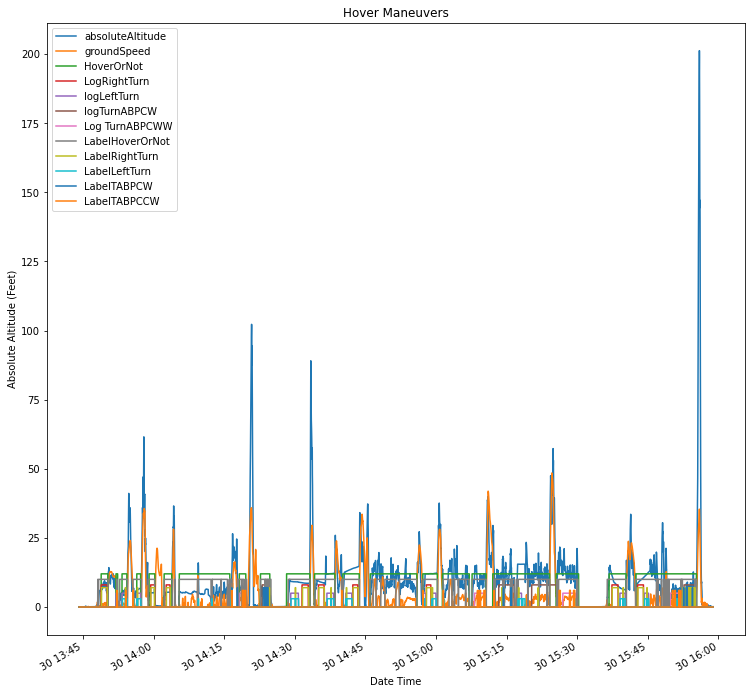

In [14]:
plt.figure(figsize=(12.5, 12.5))
df3.absoluteAltitude.plot(label = "absoluteAltitude")
df3.groundSpeed.plot(label = "groundSpeed")
df3.HoverOrNot.plot(label = "HoverOrNot")
df3.RightTurn.plot(label = "LogRightTurn")
df3.LeftTurn.plot(label = "logLeftTurn")
df3.TurnABpointCW.plot(label = "logTurnABPCW")
df3.TurnABpointCCW.plot(label = "Log TurnABPCWW")
df3.LabHoverOrNot.plot(label = "LabelHoverOrNot")
df3.LabRightTurn.plot(label = "LabelRightTurn")
df3.LabLeftTurn.plot(label = "LabelLeftTurn")
df3.LabTurnABPCW.plot(label = "LabelTABPCW")
df3.LabTurnABPCCW.plot(label = "LabelTABPCCW")
plt.title('Hover Maneuvers')
plt.ylabel('Absolute Altitude (Feet)')
plt.xlabel('Date Time')
plt.legend()
plt.show()

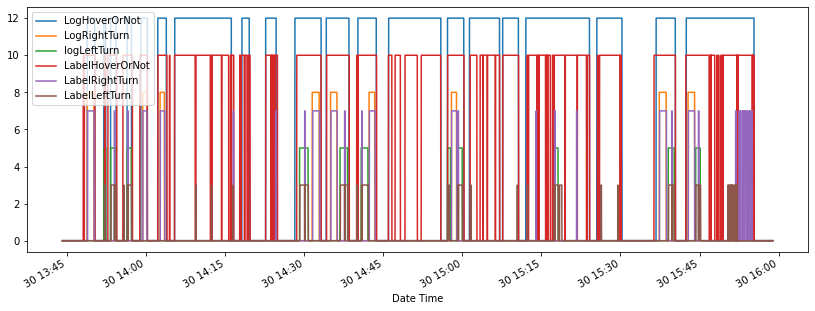

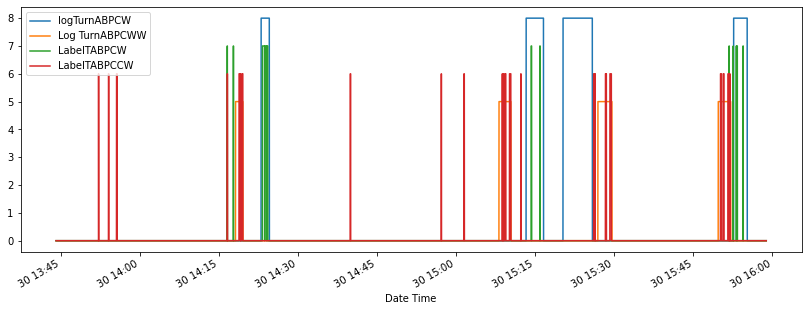

In [15]:
plt.figure(figsize=(14, 5))
df3.HoverOrNot.plot(label = "LogHoverOrNot")
df3.RightTurn.plot(label = "LogRightTurn")
df3.LeftTurn.plot(label = "logLeftTurn")
df3.LabHoverOrNot.plot(label = "LabelHoverOrNot")
df3.LabRightTurn.plot(label = "LabelRightTurn")
df3.LabLeftTurn.plot(label = "LabelLeftTurn")
plt.legend(loc = 2)
plt.xlabel('Date Time')
plt.show()

plt.figure(figsize=(14, 5))
#ax2 = df3.HoverOrNot.plot(label = "LogHoverOrNot")
ax2 = df3.TurnABpointCW.plot(label = "logTurnABPCW")
ax2 = df3.TurnABpointCCW.plot(label = "Log TurnABPCWW")
#ax2 = df3.LabHoverOrNot.plot(label = "LabelHoverOrNot")

ax2 = df3.LabTurnABPCW.plot(label = "LabelTABPCW")
ax2 = df3.LabTurnABPCCW.plot(label = "LabelTABPCCW")
plt.xlabel('Date Time')
plt.legend(loc = 2)
plt.show()

In order to quantify the performance of the functions we used the accuracy score function from the scikit learn library. We set the true and predicted values to a boolean that returns a true or false when the defined column is greater than zero (i.e. False if the value is not greater than zero, or it is not a hover). The "accuracy_score" returns a percentage of when the two columns are reporting the same true or false values. 

***We do have to be careful about reading too much into the values, a "Right Pedal Turn" only appears a few times in the dataset, so as long as the method is not returning false right turns, it naturally should have a high accuracy. A Hover is far more prevalent so may be a better indicator. 

In [16]:
from sklearn.metrics import accuracy_score

hover_true = df3.HoverOrNot > 0 
hover_pred = df3.LabHoverOrNot > 0

Hover_acc = accuracy_score(hover_true, hover_pred)
print(Hover_acc)

RTurn_true = df3.RightTurn > 0 
RTurn_pred = df3.LabRightTurn > 0

RTurn_acc = accuracy_score(RTurn_true, RTurn_pred)


LTurn_true = df3.LeftTurn > 0
LTurn_pred = df3.LabLeftTurn > 0

LTurn_acc = accuracy_score(LTurn_true, LTurn_pred)

TABPCW_true = df3.TurnABpointCW > 0
TABPCW_pred = df3.LabTurnABPCW > 0

TurnABpointCW_acc = accuracy_score(TABPCW_true, TABPCW_pred)


TABPCCW_true = df3.TurnABpointCCW > 0
TABPCCW_pred = df3.LabTurnABPCCW > 0

TurnABpointCCW_acc = accuracy_score(TABPCCW_true, TABPCCW_pred)

acc = {'Maneuver': ['Hover', 'Right Turn', 'Left Turn', 'CW Turn About Point', 'CCW Turn About Point'], 
       'Accuracy': [Hover_acc, RTurn_acc, LTurn_acc, TurnABpointCW_acc, TurnABpointCCW_acc]}

df_acc = pd.DataFrame(acc)
df_acc

0.8920297374518472


,Maneuver,Accuracy
0,Hover,0.892030
1,Right Turn,0.976733
2,Left Turn,0.971223
3,CW Turn About Point,0.914091
4,CCW Turn About Point,0.947101


In [42]:
df3.to_csv('HoverLabels_30JUN.csv', index_label = 'datetime')

In [32]:
#Get Start and Stop times for the visualization of GANT Chart 

first_index = []

for j,i in enumerate(df3['LabHoverOrNot']):
    if j == 0:
        first_index.append([i,j])
    else:
        if i != df3['LabHoverOrNot'][j-1]:
            first_index.append([df3['LabHoverOrNot'][j-1],j-1])
            first_index.append([i,j])

arr = []
for i,j in enumerate(first_index):
    #print(i)
    #print(j)
    if j[0]!= 0 and first_index[i-1][0]==0 :
        arr.append(dict(Task="Hover %s"%i,
                        Start=df3.index[first_index[i][1]],
                        Finish=df3.index[first_index[i+1][1]],
                        Maneuver='Hover'
                       )
                  )
arr
###RIGHT TURN 
first_indexR = []

for j,i in enumerate(df3['LabRightTurn']):
    if j == 0:
        first_indexR.append([i,j])
    else:
        if i != df3['LabRightTurn'][j-1]:
            first_indexR.append([df3['LabRightTurn'][j-1],j-1])
            first_indexR.append([i,j])

for i,j in enumerate(first_indexR):
    #print(i)
    #print(j)
    if j[0]!= 0 and first_indexR[i-1][0]==0 :
        arr.append(dict(Task="Right Turn %s"%i,
                        Start=df3.index[first_indexR[i][1]],
                        Finish=df3.index[first_indexR[i+1][1]],
                        Maneuver='Right Turn'
                       )
                  )

### LEFT TURN        
first_indexL = []

for j,i in enumerate(df3['LabLeftTurn']):
    if j == 0:
        first_indexL.append([i,j])
    else:
        if i != df3['LabLeftTurn'][j-1]:
            first_indexL.append([df3['LabLeftTurn'][j-1],j-1])
            first_indexL.append([i,j])

for i,j in enumerate(first_indexL):
    #print(i)
    #print(j)
    if j[0]!= 0 and first_indexL[i-1][0]==0:
        arr.append(dict(Task="Left Turn %s"%i,
                        Start=df3.index[first_indexL[i][1]],
                        Finish=df3.index[first_indexL[i+1][1]],
                        Maneuver='Left Turn'
                       )
                  )

#TURN ABOUT A POINT CLOCKWISE       
first_indexTABPCW = []

for j,i in enumerate(df3['LabTurnABPCW']):
    if j == 0:
        first_indexTABPCW.append([i,j])
    else:
        if i != df3['LabTurnABPCW'][j-1]:
            first_indexTABPCW.append([df3['LabTurnABPCW'][j-1],j-1])
            first_indexTABPCW.append([i,j])

for i,j in enumerate(first_indexTABPCW):
    #print(i)
    #print(j)
    if j[0]!= 0 and first_indexTABPCW[i-1][0] == 0 :
        arr.append(dict(Task="TABP Clockwise %s"%i,
                        Start=df3.index[first_indexTABPCW[i][1]],
                        Finish=df3.index[first_indexTABPCW[i+1][1]],
                        Maneuver='TABP Clockwise'
                       )
                  )

#Turn About a Point Counter-Clockwise         
first_indexTABPCCW = []

for j,i in enumerate(df3['LabTurnABPCCW']):
    if j == 0:
        first_indexTABPCCW.append([i,j])
    else:
        if i != df3['LabTurnABPCCW'][j-1]:
            first_indexTABPCCW.append([df3['LabTurnABPCCW'][j-1],j-1])
            first_indexTABPCCW.append([i,j])

for i,j in enumerate(first_indexTABPCCW):
    #print(i)
    #print(j)
    if j[0]!= 0 and first_indexTABPCCW[i-1][0] ==0 :
        arr.append(dict(Task="TABP Counter-Clockwise %s"%i,
                        Start=df3.index[first_indexTABPCCW[i][1]],
                        Finish=df3.index[first_indexTABPCCW[i+1][1]],
                        Maneuver='TABP Counter-Clockwise'
                       )
                  )


0
[0, 0]
1
[0, 9988]
2
[10, 9989]
3
[10, 10065]
4
[0, 10066]
5
[0, 10446]
6
[10, 10447]
7
[10, 15515]
8
[0, 15516]
9
[0, 19990]
10
[10, 19991]
11
[10, 20214]
12
[0, 20215]
13
[0, 21808]
14
[10, 21809]
15
[10, 26262]
16
[0, 26263]
17
[0, 29265]
18
[10, 29266]
19
[10, 33980]
20
[0, 33981]
21
[0, 37640]
22
[10, 37641]
23
[10, 41475]
24
[0, 41476]
25
[0, 46871]
26
[10, 46872]
27
[10, 51266]
28
[0, 51267]
29
[0, 52486]
30
[10, 52487]
31
[10, 52513]
32
[0, 52514]
33
[0, 54704]
34
[10, 54705]
35
[10, 64162]
36
[0, 64163]
37
[0, 64502]
38
[10, 64503]
39
[10, 70986]
40
[0, 70987]
41
[0, 71453]
42
[10, 71454]
43
[10, 71593]
44
[0, 71594]
45
[0, 71634]
46
[10, 71635]
47
[10, 76028]
48
[0, 76029]
49
[0, 76149]
50
[10, 76150]
51
[10, 79307]
52
[0, 79308]
53
[0, 80130]
54
[10, 80131]
55
[10, 80433]
56
[0, 80434]
57
[0, 80445]
58
[10, 80446]
59
[10, 80504]
60
[0, 80505]
61
[0, 80563]
62
[10, 80564]
63
[10, 81646]
64
[0, 81647]
65
[0, 84828]
66
[10, 84829]
67
[10, 85177]
68
[0, 85178]
69
[0, 85570]
70

In [38]:
import plotly.express as px
import pandas as pd
filename = '30Jun Hover Data'
Hoverdf = pd.DataFrame(arr)

fig = px.timeline(Hoverdf, x_start="Start", x_end="Finish", y="Maneuver", color="Maneuver")
fig.update_layout(title = {'text': filename, 'x': 0.5})

fig.show()

In [43]:
#print(Hoverdf.tail(20))